In [2]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.metrics import classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Set paths to train and test directories
train_dir = "/content/drive/MyDrive/6CS012 AI & Machine Learning/Worksheet 5/train"
test_dir = "/content/drive/MyDrive/6CS012 AI & Machine Learning/Worksheet 5/test"


TASK 1

1. Data Understanding and Visualization

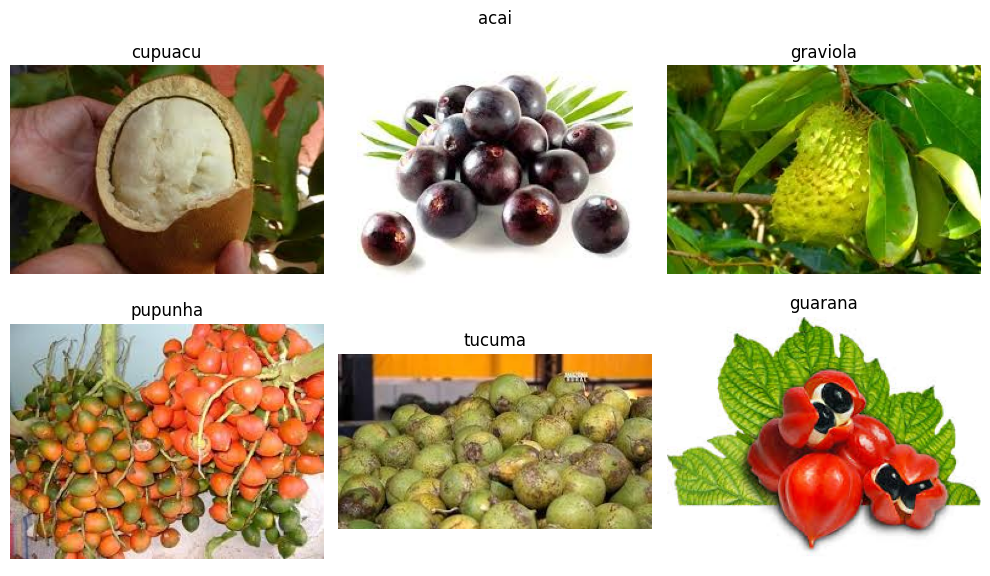

In [11]:
train_dir = "/content/drive/MyDrive/6CS012 AI & Machine Learning/Worksheet 5/train"
class_names = sorted(os.listdir(train_dir))

# Visualize 6 random class images
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(random.sample(class_names, 6)):
    class_path = os.path.join(train_dir, class_name)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


 2. Check for Corrupted Image

In [12]:

from PIL import UnidentifiedImageError

corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                img.verify()
        except (IOError, SyntaxError, UnidentifiedImageError):
            corrupted_images.append(img_path)
            os.remove(img_path)
            print(f"Removed corrupted image: {img_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


Task2: Loading and Preprocessing Image Data inkeras:

In [13]:
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation='nearest'
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation='nearest'
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Implement a CNN

In [14]:
# Task 3: Implement a CNN

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TASK 4 : Compile the model

In [21]:


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train the model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.1047 - loss: 1.9656

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 987ms/step - accuracy: 0.1063 - loss: 1.9866 - val_accuracy: 0.1667 - val_loss: 1.8747
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.1380 - loss: 1.7734 - val_accuracy: 0.0556 - val_loss: 1.9385
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.1690 - loss: 1.7389

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.1753 - loss: 1.7343 - val_accuracy: 0.0556 - val_loss: 1.8690
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.1985 - loss: 1.6598

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.2079 - loss: 1.6545 - val_accuracy: 0.1667 - val_loss: 1.8271
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3490 - loss: 1.5216

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - accuracy: 0.3555 - loss: 1.5146 - val_accuracy: 0.2222 - val_loss: 1.8192
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - accuracy: 0.5543 - loss: 1.3219 - val_accuracy: 0.2778 - val_loss: 2.0320
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.5660 - loss: 1.1501

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 833ms/step - accuracy: 0.5599 - loss: 1.1510 - val_accuracy: 0.3333 - val_loss: 1.6636
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7402 - loss: 0.9234

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 511ms/step - accuracy: 0.7391 - loss: 0.9215 - val_accuracy: 0.3889 - val_loss: 1.4583
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.8620 - loss: 0.6201 - val_accuracy: 0.4444 - val_loss: 1.6515
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9300 - loss: 0.4363

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 0.9301 - loss: 0.4376 - val_accuracy: 0.5000 - val_loss: 1.3391
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.9015 - loss: 0.4084 - val_accuracy: 0.6111 - val_loss: 1.4483
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.9705 - loss: 0.2277 - val_accuracy: 0.4444 - val_loss: 2.1648
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 765ms/step - accuracy: 0.9006 - loss: 0.2829 - val_accuracy: 0.5000 - val_loss: 1.7075
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 1.0000 - loss: 0.0998 - val_accuracy: 0.6667 - val_loss: 1.3803
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.9705 - loss: 0.1175 - val_accuracy: 0.5556 - val_loss: 1.4604
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 1.0000 - loss: 0.0515 - val_accuracy: 0.5000 - val_loss: 1.7836
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 1.0000 - loss: 0.0376 - val_accuracy: 0.5000 - val_lo

Task 5: Evaluate the model

In [17]:
# Task 5: Evaluate the Model

test_dir = "/content/drive/MyDrive/6CS012 AI & Machine Learning/Worksheet 5/test"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

model.load_weights("best_model.h5")
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5333 - loss: 1.1082
Test Accuracy: 0.5333, Test Loss: 1.1082


Task 6: Save and load the model

In [18]:
# Task 6: Save and Load the Model

# Save
model.save("final_model.h5")

# Load
loaded_model = tf.keras.models.load_model("final_model.h5")

# Re-evaluate
loss, accuracy = loaded_model.evaluate(test_ds)
print(f"Reloaded Model Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.5333 - loss: 1.1082
Reloaded Model Accuracy: 0.5333, Loss: 1.1082


Predictions and Classification Report

In [20]:
# Task 7: Predictions and Classification Report

import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Classification Report:

              precision    recall  f1-score   support

        acai       0.75      0.60      0.67         5
     cupuacu       0.33      0.80      0.47         5
    graviola       0.75      0.60      0.67         5
     guarana       0.60      0.60      0.60         5
     pupunha       0.60      0.60      0.60         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.53        30
   macro avg       0.51      0.53      0.50        30
weighted avg       0.51      0.53      0.50        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
